# Natural Language Processing - Обработка естественного языка
## 02.02.2023
## Айдар Валеев
* аспирант Университета Иннополис
* интересы: Глубокое обучение, Машинный перевод, Генерация комментариев для исходного кода


<br>

---
<br>

# Прошлое занятие
* Предобработка текста
* Парсинг
* Задачи NLP
* TF-IDF
* Семантический анализ

<br>

---
<br>

# План на сегодня
* **Языковое моделирование**
* Word2vec
* LSTM Encoder-Decoder
* Attention mechanism
* Transformer
* BERT/GPT

<br>

---
<br>

Первые 10 наиболее употребительных слов русского языка
1. и
2. в
3. не
4. на
5. я
6. быть
7. он
8. с
9. что
10. а

Обозначим $P$ - вероятность, тогда $P($"и"$) > P(x)$ где $x$ - любое другое слово, кроме "и".

<br>

---
<br>

Какая тогда самая вероятная последовательность из трех слов?

- $P($"и и и"$) = P($"и"$) * P($"и"$) * P($"и"$)$ **?**
- очевидно, что нет

Нам нужны условные вероятности, чтобы посчитать вероятность последовательности слов:

* $P($"и"$ | $"и"$)$ - вероятность слова "и" при условии что мы уже имеем слово "и" в последовательности
* $P($"и и"$) = P($"и"$) * P($"и"$ | $"и"$)$
* $P($"и и и"$) = P($"и"$) * P($"и"$ | $"и"$) * P($"и"$ | $"и и"$)$

<br>

---
<br>

Если обобщить для последовательности $x_n$:

* $ P(x_0...x_n) = P(x_0) * P(x_1|x_0) * P(x_2|x_0x_1) ... = \prod_0^{n-1}{P(x_i|x_0...x_{i-1})}$

<br>

---
<br>

Задача сводится к тому, чтобы предсказывать следующее слово:

* Как твои _
* \> дела


* Нажмите здесь для получения бесплатных легких _
* \> денег

Генерация текста по одному токену за раз:

* Раз, два, три, _
* \> четыре


* Раз, два, три, четыре _
* \> ,


* Раз, два, три, четыре, _
* \> пять


<br>

---

Подробнее:

[Data Science Simplified: что такое языковое моделирование для NLP?](https://bestprogrammer.ru/izuchenie/data-science-simplified-chto-takoe-yazykovoe-modelirovanie-dlya-nlp)

[N-граммные языковые модели](http://www.machinelearning.ru/wiki/images/archive/e/e9/20180912152902%21Mmta18-langmodels.pdf)

<br>

---
<br>

# План на сегодня
* Языковое моделирование
* **Word2vec**
* LSTM Encoder-Decoder
* Attention mechanism
* Transformer
* BERT/GPT

<br>

---
<br>

TF-IDF строит матрицу документ-слово, а значит:
 - порядок слов не учитывается
 - значения слов неразличимы, так как присутсвует только частотная информация - отношение слова к документу

![]()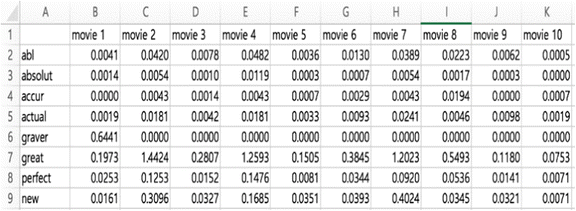

<br>

---
<br>

Чтобы действительно выявить значения слов нужно добавить отношения слов друг к другу, как часто они встречаются вместе и в каком контексте.

Две возможные постановки задачи:
- **CBOW** - Continuous Bag of Words:
  - Предсказать слово по окружающему контексту
  - Четыре, Пять! __ иду искать!  ->  Я
- **Skip-gram**:
  - Предсказать окружающий контекст по среднему слову
  - Я  ->  Четыре, Пять! __ иду искать!

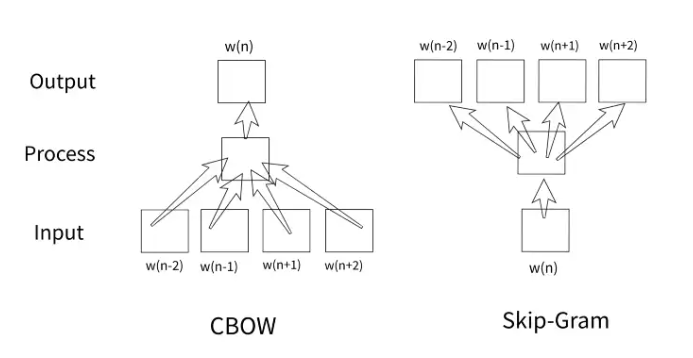

In [ ]:
king - 3

[0 0 0 1 0]
NN
[0.1, 0.3, .5] 
NN
[0 0 0 0.9 0.1]

[0 0 0 1 0]


<br>

---
<br>

Word2vec - двухслойная нейронная сеть для генерации эмбеддингов (векторов) для слов на основе большого корпуса текста

## Word2vec code

In [ ]:
!pip install torchdata

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 9.1 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
from torchtext.datasets import WikiText103, WikiText2


# data = WikiText2(split="train") 
# DATASET_SIZE = 36718

data = WikiText103(split="train")
DATASET_SIZE = 1801350

for _, x in zip(range(5), data):
    print(x.strip())


= Valkyria Chronicles III =

Senjō no Valkyria 3 : <unk> Chronicles ( Japanese : 戦場のヴァルキュリア3 , lit . Valkyria of the Battlefield 3 ) , commonly referred to as Valkyria Chronicles III outside Japan , is a tactical role @-@ playing video game developed by Sega and Media.Vision for the PlayStation Portable . Released in January 2011 in Japan , it is the third game in the Valkyria series . Employing the same fusion of tactical and real @-@ time gameplay as its predecessors , the story runs parallel to the first game and follows the " Nameless " , a penal military unit serving the nation of Gallia during the Second Europan War who perform secret black operations and are pitted against the Imperial unit " <unk> Raven " .
The game began development in 2010 , carrying over a large portion of the work done on Valkyria Chronicles II . While it retained the standard features of the series , it also underwent multiple adjustments , such as making the game more forgiving for series newcomers . Cha

In [ ]:
import re
import unicodedata


def preprocess_sentence(s):
    s = s.strip()
    s = s.lower()
    s = re.sub(r"[^a-zA-Z.,!?]+", " ", s)
    s = re.sub(r"\s{2,}", " ", s)
    s = s.strip()
    return s

In [ ]:
for _, x in zip(range(5), data):
    print(preprocess_sentence(x))


valkyria chronicles iii

senj no valkyria unk chronicles japanese , lit . valkyria of the battlefield , commonly referred to as valkyria chronicles iii outside japan , is a tactical role playing video game developed by sega and media.vision for the playstation portable . released in january in japan , it is the third game in the valkyria series . employing the same fusion of tactical and real time gameplay as its predecessors , the story runs parallel to the first game and follows the nameless , a penal military unit serving the nation of gallia during the second europan war who perform secret black operations and are pitted against the imperial unit unk raven .
the game began development in , carrying over a large portion of the work done on valkyria chronicles ii . while it retained the standard features of the series , it also underwent multiple adjustments , such as making the game more forgiving for series newcomers . character designer unk honjou and composer hitoshi sakimoto bo

In [ ]:
from torchtext.data import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

tokenizer = get_tokenizer("basic_english")

def build_vocab(dataset):
    for text in dataset:
        yield tokenizer(text)

vocab = build_vocab_from_iterator(build_vocab(data), max_tokens=25000, specials=["<UNK>"])
vocab.set_default_index(vocab["<UNK>"])
VOCAB_SIZE = len(vocab)
len(vocab)

25000

In [ ]:
len(vocab)

25000

In [ ]:
import torch
import torch.nn as nn


N_WORDS = 5
MAX_SEQUENCE_LENGTH = 256
EMBED_DIMENSION = 300
EMBED_MAX_NORM = 1


class CBOW_Model(nn.Module):
    def __init__(self):
        super(CBOW_Model, self).__init__()
        self.embeddings = nn.Embedding(VOCAB_SIZE, EMBED_DIMENSION, 
                                       max_norm=EMBED_MAX_NORM)
        self.linear = nn.Linear(EMBED_DIMENSION, VOCAB_SIZE)

    def forward(self, inputs_):
        x = self.embeddings(inputs_)
        x = x.mean(axis=1)
        x = self.linear(x)
        return x


class SkipGram_Model(nn.Module):
    def __init__(self):
        super(SkipGram_Model, self).__init__()
        self.embeddings = nn.Embedding(VOCAB_SIZE, EMBED_DIMENSION, 
                                       max_norm=EMBED_MAX_NORM)
        self.linear = nn.Linear(EMBED_DIMENSION, VOCAB_SIZE)

    def forward(self, inputs_):
        x = self.embeddings(inputs_)
        x = self.linear(x)
        return x

In [ ]:
def text_pipeline(x): 
    return vocab(tokenizer(x))

def collate_cbow(batch):
    batch_input, batch_output = [], []
    for text in batch:
        text_tokens_ids = text_pipeline(text)

        if len(text_tokens_ids) < N_WORDS * 2 + 1:
            continue

        if MAX_SEQUENCE_LENGTH:
            text_tokens_ids = text_tokens_ids[:MAX_SEQUENCE_LENGTH]

        for idx in range(len(text_tokens_ids) - N_WORDS * 2):
            token_id_sequence = text_tokens_ids[idx : (idx + N_WORDS * 2 + 1)]
            output = token_id_sequence.pop(N_WORDS)
            input_ = token_id_sequence
            batch_input.append(input_)
            batch_output.append(output)

    batch_input = torch.tensor(batch_input, dtype=torch.long)
    batch_output = torch.tensor(batch_output, dtype=torch.long)
    return batch_input, batch_output


def collate_skipgram(batch):
    batch_input, batch_output = [], []
    for text in batch:
        text_tokens_ids = text_pipeline(text)

        if len(text_tokens_ids) < N_WORDS * 2 + 1:
            continue

        if MAX_SEQUENCE_LENGTH:
            text_tokens_ids = text_tokens_ids[:MAX_SEQUENCE_LENGTH]

        for idx in range(len(text_tokens_ids) - N_WORDS * 2):
            token_id_sequence = text_tokens_ids[idx : (idx + N_WORDS * 2 + 1)]
            input_ = token_id_sequence.pop(N_WORDS)
            outputs = token_id_sequence

            for output in outputs:
                batch_input.append(input_)
                batch_output.append(output)

    batch_input = torch.tensor(batch_input, dtype=torch.long)
    batch_output = torch.tensor(batch_output, dtype=torch.long)
    return batch_input, batch_output

In [ ]:
from functools import partial
from tqdm.notebook import tqdm
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import LambdaLR


def train(model, epochs, batch_size, collate_fn, device):
    dataloader = DataLoader(data, batch_size=batch_size, 
                            shuffle=True, collate_fn=collate_fn)

    optimizer = Adam(model.parameters(), lr=0.05)
    criterion = nn.CrossEntropyLoss()

    lr_lambda = lambda epoch: (epochs - epoch) / epochs
    lr_scheduler = LambdaLR(optimizer, lr_lambda=lr_lambda)

    model.train()
    model.to(device)

    for epoch in range(epochs):
        for i, batch_data in enumerate(tqdm(dataloader, total=DATASET_SIZE // batch_size + 1)):
            inputs = batch_data[0].to(device)
            labels = batch_data[1].to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        lr_scheduler.step()
        print(f"Epoch: {epoch + 1}/{epochs}, Train Loss={loss.item()}")

In [ ]:
from torch.optim import Adam

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

cbow_model = CBOW_Model()
train(cbow_model, 1, 256, collate_cbow, device)

# skipgram_model = SkipGram_Model()
# train(skipgram_model, 20, 64, collate_skipgram, device)

  0%|          | 0/7037 [00:00<?, ?it/s]

Epoch: 1/1, Train Loss=5.832339763641357


In [ ]:
import numpy as np


embeddings = cbow_model.embeddings.weight.cpu().detach().numpy()

def embed(word):
    return embeddings[vocab[word]]

result = embed("man") - embed("boy") + embed("girl")

scores = ((embeddings - result) ** 2).mean(axis=1)
i = np.argmin(scores)
print(vocab.get_itos()[i])

girl


[FastText](https://fasttext.cc/) - Word2vec, включающий в эмбеддинг информацию из морфем (под-слов)

[GloVe](https://nlp.stanford.edu/projects/glove/) - Word2vec с оптимизированной функцией потерь, учитывающей не только локальный контекст, но и глобальную статистику совместных появлений слов.

In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M-subword.vec.zip
!unzip wiki-news-300d-1M-subword.vec.zip

--2023-02-02 15:12:53--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M-subword.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 172.67.9.4, 104.22.75.142, 104.22.74.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|172.67.9.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 587879973 (561M) [application/zip]
Saving to: ‘wiki-news-300d-1M-subword.vec.zip.2’

wiki-news-300d-1M-s 100%[===================>] 560.65M  8.24MB/s    in 72s     

2023-02-02 15:14:07 (7.74 MB/s) - ‘wiki-news-300d-1M-subword.vec.zip.2’ saved [587879973/587879973]

Archive:  wiki-news-300d-1M-subword.vec.zip
replace wiki-news-300d-1M-subword.vec? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import io

def load_vectors(fname):
    fin = io.open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    n, d = map(int, fin.readline().split())
    data = {}
    for line in fin:
        tokens = line.rstrip().split(' ')
        if tokens[0].lower() in ["king", "queen", "man", "woman", "moscow", "russia", "berlin", "germany", "girl", "boy"]:
            data[tokens[0]] = list(map(float, tokens[1:]))
    return data

embeddings = load_vectors("wiki-news-300d-1M-subword.vec")

In [ ]:
embeddings.keys()

dict_keys(['man', 'Russia', 'Germany', 'woman', 'King', 'girl', 'Man', 'boy', 'king', 'Queen', 'Moscow', 'Berlin', 'Boy', 'Girl', 'queen', 'Woman', 'MAN', 'russia', 'MOSCOW', 'germany', 'BERLIN', 'KING', 'BOY', 'RUSSIA', 'WOMAN', 'GIRL', 'GERMANY', 'QUEEN', 'berlin', 'moscow', 'KIng', 'RUssia', 'WoMan', 'MoSCoW'])

In [ ]:
import numpy as np

def embed(word):
    return np.array(embeddings[word])

result = embed("woman") - embed("girl") + embed("boy")
scores = []
for w, v in embeddings.items():
    score = ((v - result) ** 2).mean()
    scores.append((score, w))

print(sorted(scores)[:5])

[(0.0004172131, 'woman'), (0.00042887733333333325, 'man'), (0.00043693380000000003, 'boy'), (0.0006604369666666667, 'girl'), (0.0009813462666666667, 'king')]


In [ ]:
result = embed("Russia") - embed("Moscow") + embed("Berlin")
scores = []
for w, v in embeddings.items():
    score = ((v - result) ** 2).mean()
    scores.append((score, w))

print(sorted(scores)[:5])

[(0.00022855359999999995, 'Berlin'), (0.0002622115, 'Germany'), (0.0004049818, 'Russia'), (0.00047346773333333333, 'RUssia'), (0.0004949885, 'germany')]


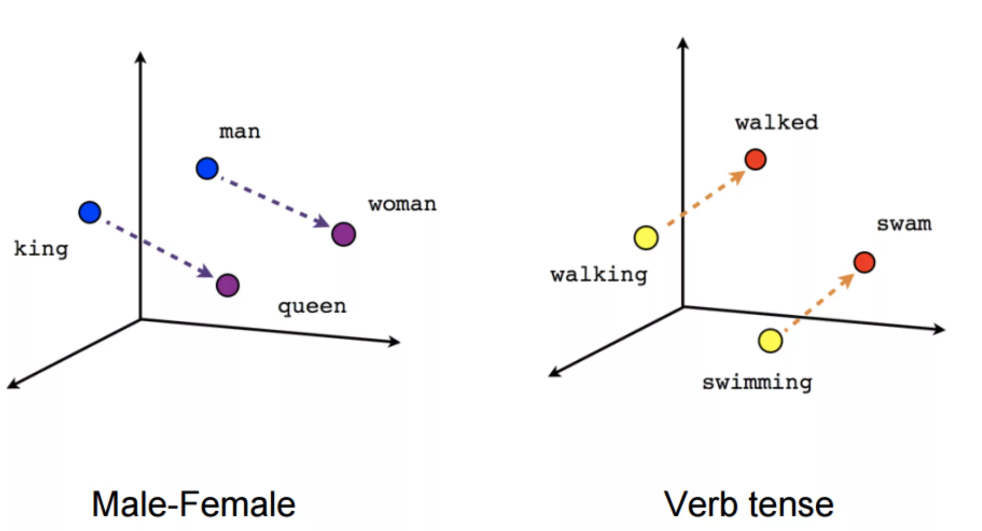

[Word Embeddings Хабр](https://habr.com/ru/company/ods/blog/329410/)

[Word2vec by OlgaChernytska](https://github.com/OlgaChernytska/word2vec-pytorch/tree/main/utils)

[PyTorch — ваш новый фреймворк глубокого обучения](https://habr.com/ru/post/334380/)

[PYTORCH TUTORIALS](https://pytorch.org/tutorials/)

[TorchText Datasets](https://pytorch.org/text/stable/datasets.html#wikitext-2)

[TorchText Vocab](https://pytorch.org/text/stable/vocab.html)

[Negative Sampling](https://habr.com/ru/company/ods/blog/329410/)

<br>

---
<br>

# План на сегодня
* Языковое моделирование
* Word2vec
* **LSTM Encoder-Decoder**
* Attention mechanism
* Transformer
* BERT/GPT

## RNN

Рекуррентные нейронные сети (Recurrent neural network; RNN) — вид нейронных сетей, где связи между элементами образуют направленную последовательность. Благодаря этому появляется возможность обрабатывать серии событий во времени или последовательные пространственные цепочки. В отличие от многослойных перцептронов, рекуррентные сети могут использовать свою внутреннюю память для обработки последовательностей произвольной длины. 

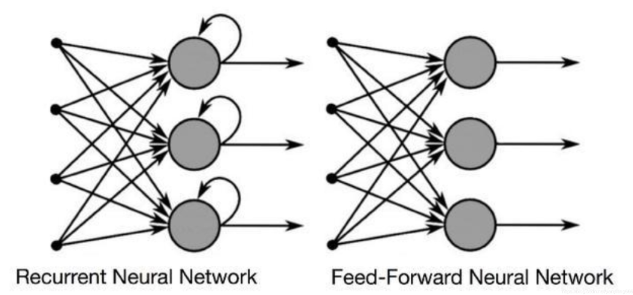

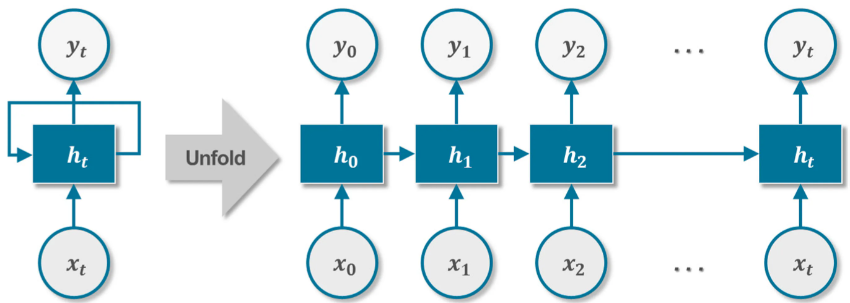

<br>

---
<br>

## LSTM и GRU

Две наиболее популярные архитектуры рекуррентных нейронных сетей:
- Long Short-Term Memory (LSTM) unit
- Gated Recurrent Unit

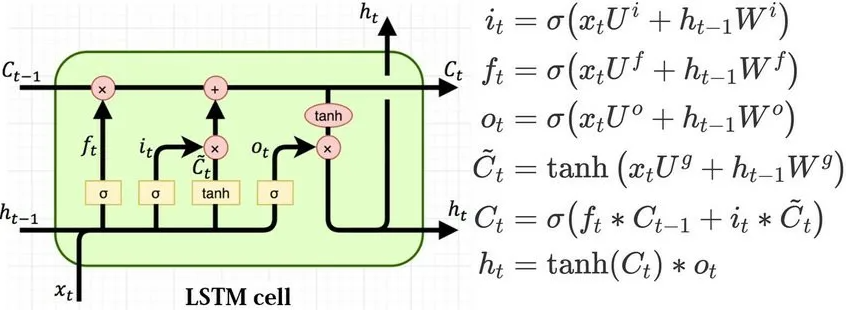

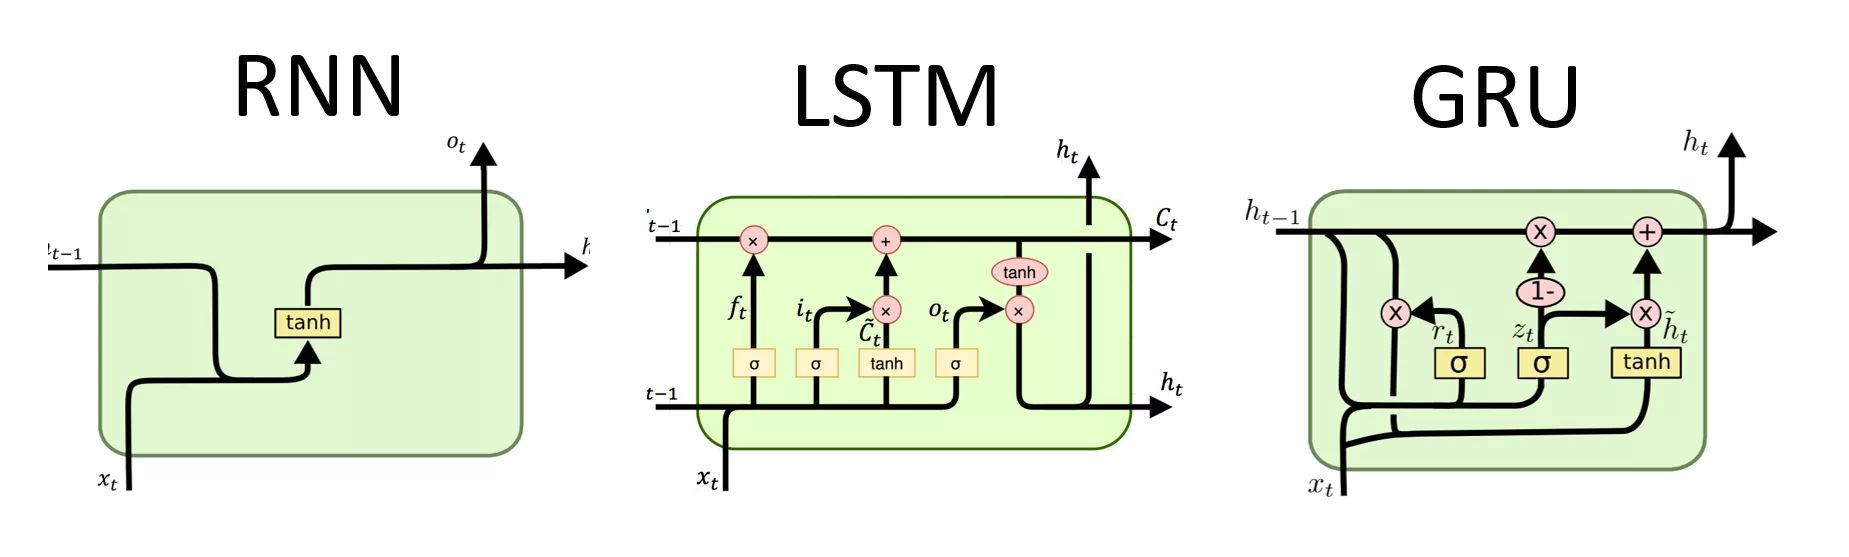

[Backpropagation Through Time](https://mmuratarat.github.io/2019-02-07/bptt-of-rnn)

## LSTM Encoder Decoder

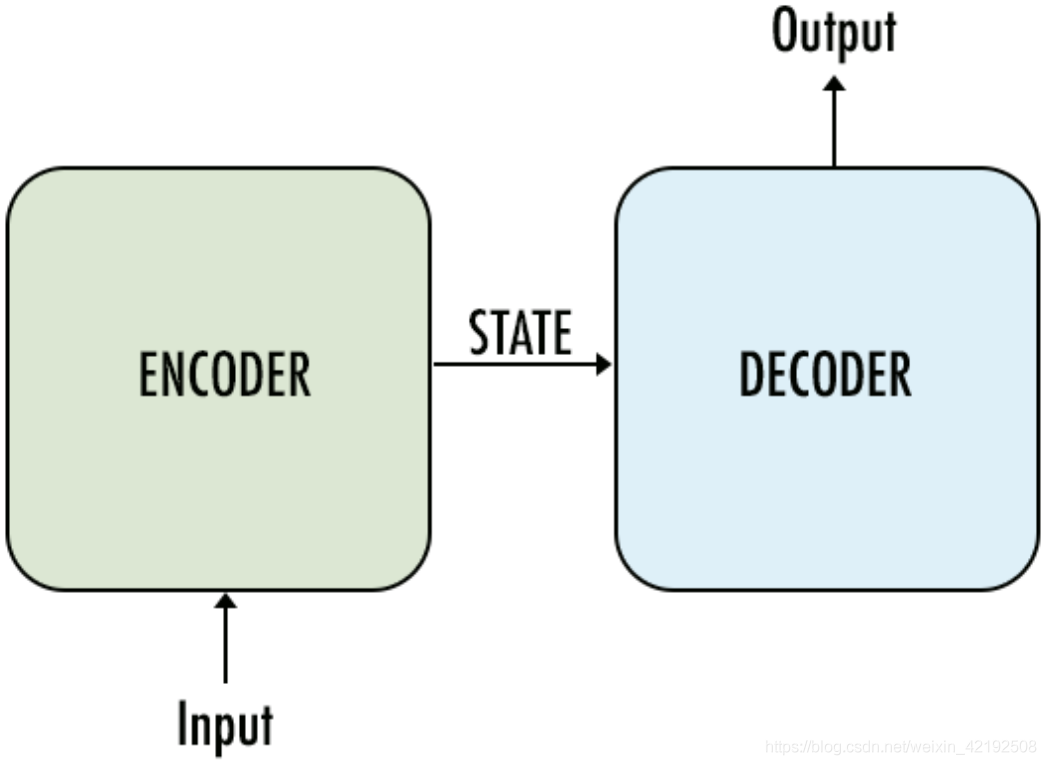

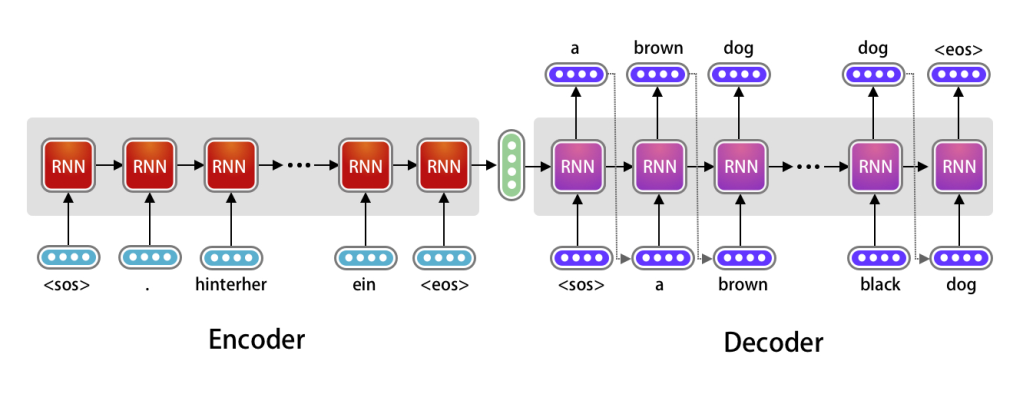

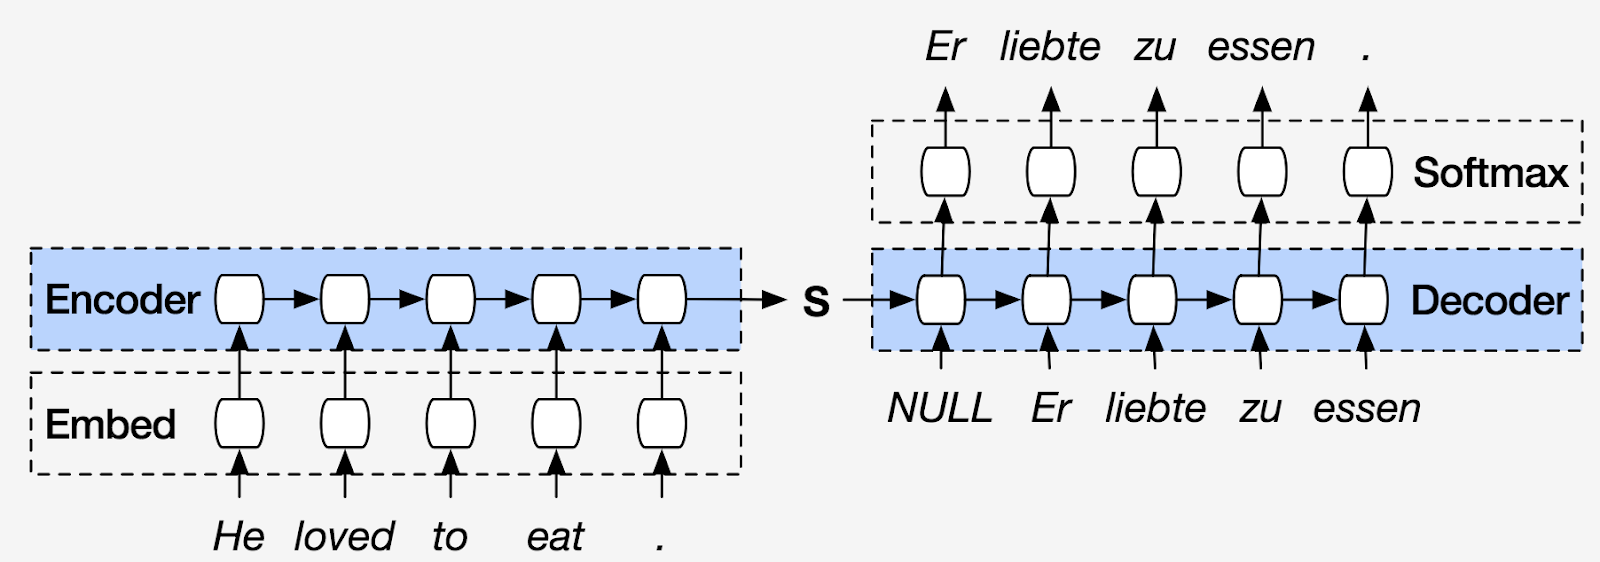

- Проблема с длинными последовательностями
    - обратный порядок входной последовательности

<br>

---
<br>

# План на сегодня
* Языковое моделирование
* Word2vec
* LSTM Encoder-Decoder
* **Attention mechanism**
* Transformer
* BERT/GPT

## Bahdanau Additive Attention

[Хабр](https://habr.com/ru/post/486158/)

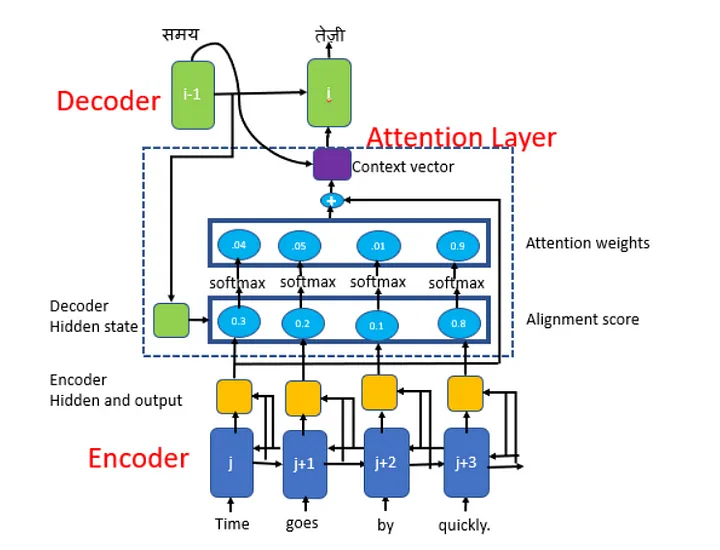


<img src="https://www.tensorflow.org/images/seq2seq/attention_equation_0.jpg" alt="attention equation 0" width="800">
<img src="https://www.tensorflow.org/images/seq2seq/attention_equation_1.jpg" alt="attention equation 1" width="800">

- Долгое и нестабильное обучение из-за [Backpropagation Through Time](https://mmuratarat.github.io/2019-02-07/bptt-of-rnn)
- [PyTorch implementation](https://drive.google.com/file/d/1GcgFGo4JeucIkwcEUX8x5dcOF3Mi9194/view?usp=sharing)

<br>

---
<br>

# План на сегодня
* Языковое моделирование
* Word2vec
* LSTM Encoder-Decoder
* Attention mechanism
* **Transformer**
* BERT/GPT

[Как работают трансформеры — крутейшие нейросети наших дней](https://sysblok.ru/knowhow/kak-rabotajut-transformery-krutejshie-nejroseti-nashih-dnej/)

[Attention Is All You Need](https://arxiv.org/pdf/1706.03762.pdf) / Внимание - это всё, что тебе нужно

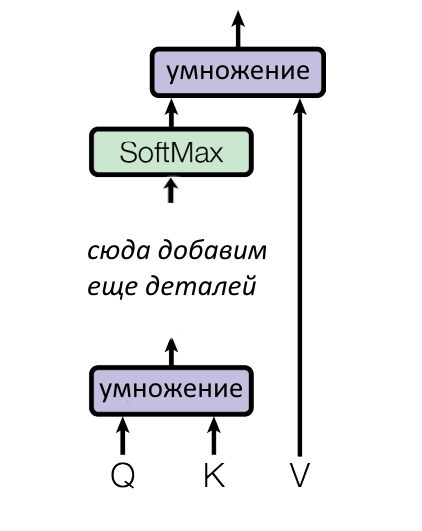

Представим, что Q - эмбеддинг декодера, K = V - эмбеддинги энкодера. Тогда умножение и последующий softmax - веса attention, которые потом умножаются на эмбеддинги энкодера, чтобы получить контекст-вектор

- Q - query / запрос
- K - key / ключ
- V - value / значение

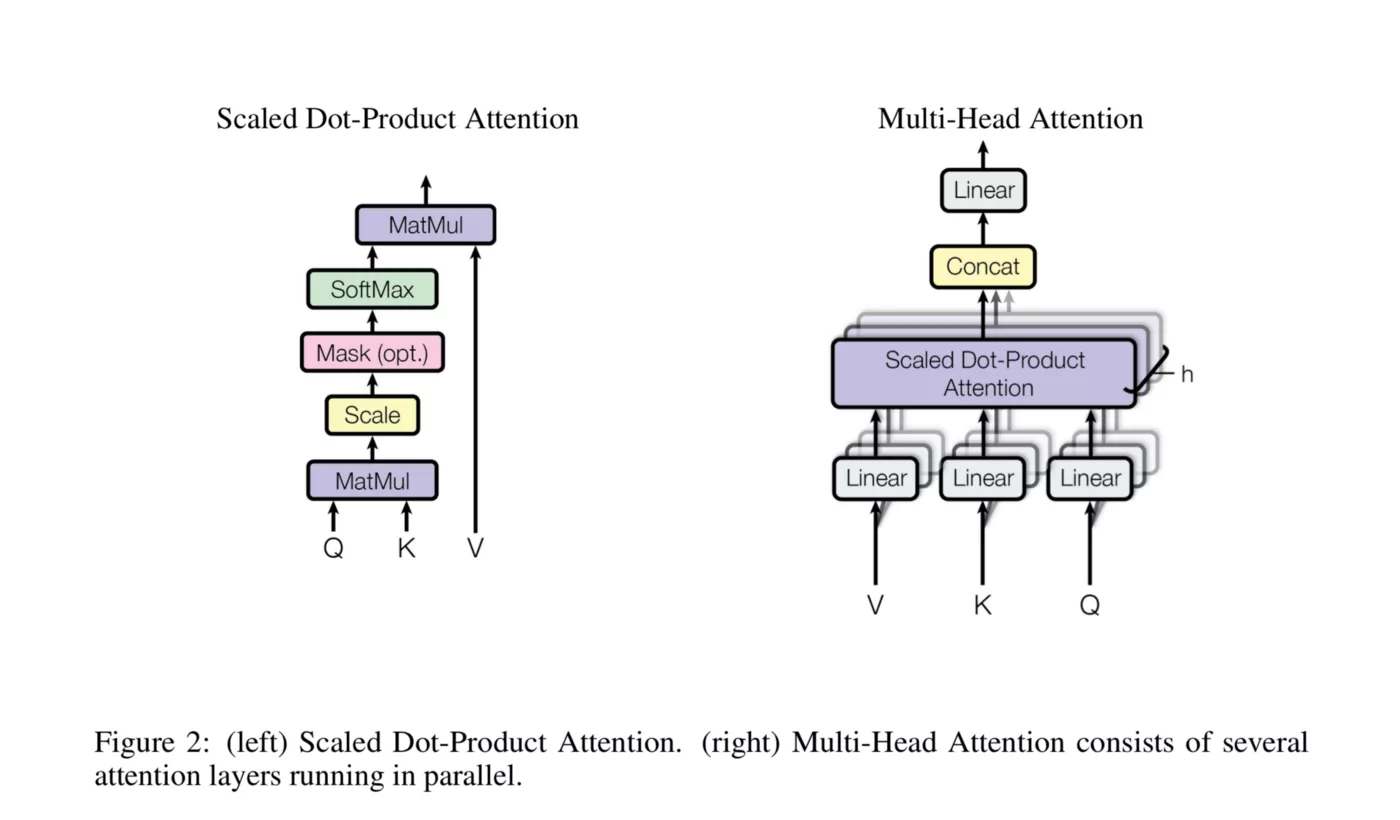

Когда Q = K = V -- такой attention уже называется Self-Attention - механизм самовнимания

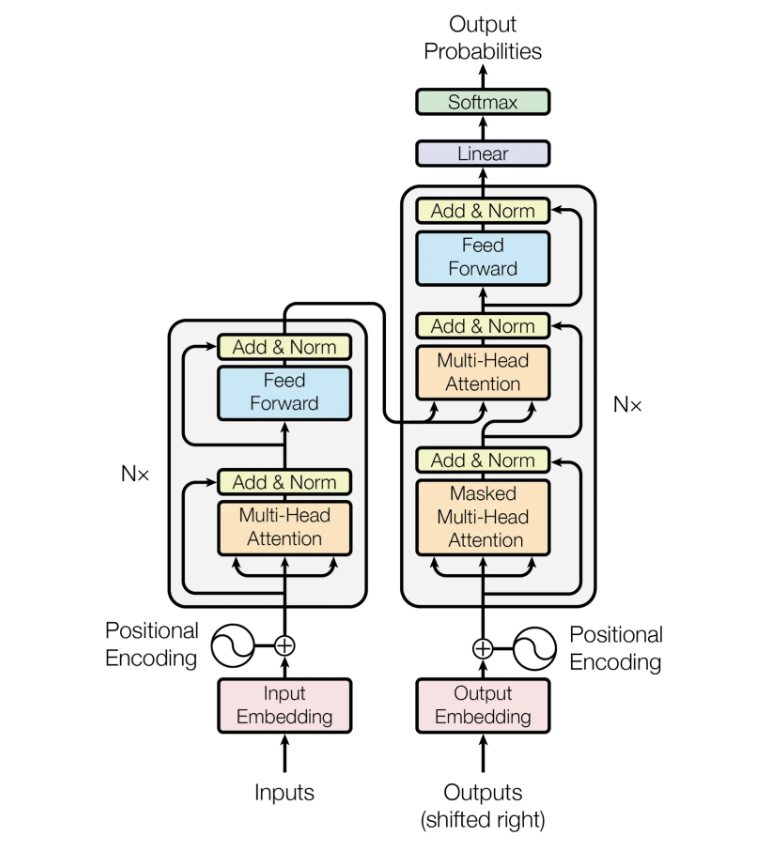

Преимущества:
- скорость обучения - входные токены обрабатываются параллельно
- лучше качество на длинных последовательностях

Важные моменты для полного понимания работы Transformer:
- Teacher Forcing
- Layer Normalization
- Positional Encoding
- Beam Search
- Label smoothing

<br>

---
<br>

# План на сегодня
* Языковое моделирование
* Word2vec
* LSTM Encoder-Decoder
* Attention mechanism
* Transformer
* **BERT/GPT**

<br>

---
<br>

А как классифицировать тексты с помощью Transformer? - взять только энкодер и предобучить на двух задачах
- **Mask LM** - Masked Language Modeling - Маскированное Языковое Моделирование
  - [CLS] Раз, два, [MASK], четыре, пять. [MASK] иду искать! -> [CLS] Раз, два, три, четыре, пять. Я иду искать!
- **NSP** - Next Sentence Prediction - Является ли второе предложение логическим продолжением первого?
  - [CLS] Раз, два, три, четыре, пять. [SEP] Я иду искать! -> [CLS] + нейронный слой

Получился **BERT** - Bidirectional Encoder Representations from Transformers

Чем же он хорош? - Тем что предобученную модель можно дообучить под конкретную задачу - и получить state-of-the-art результаты

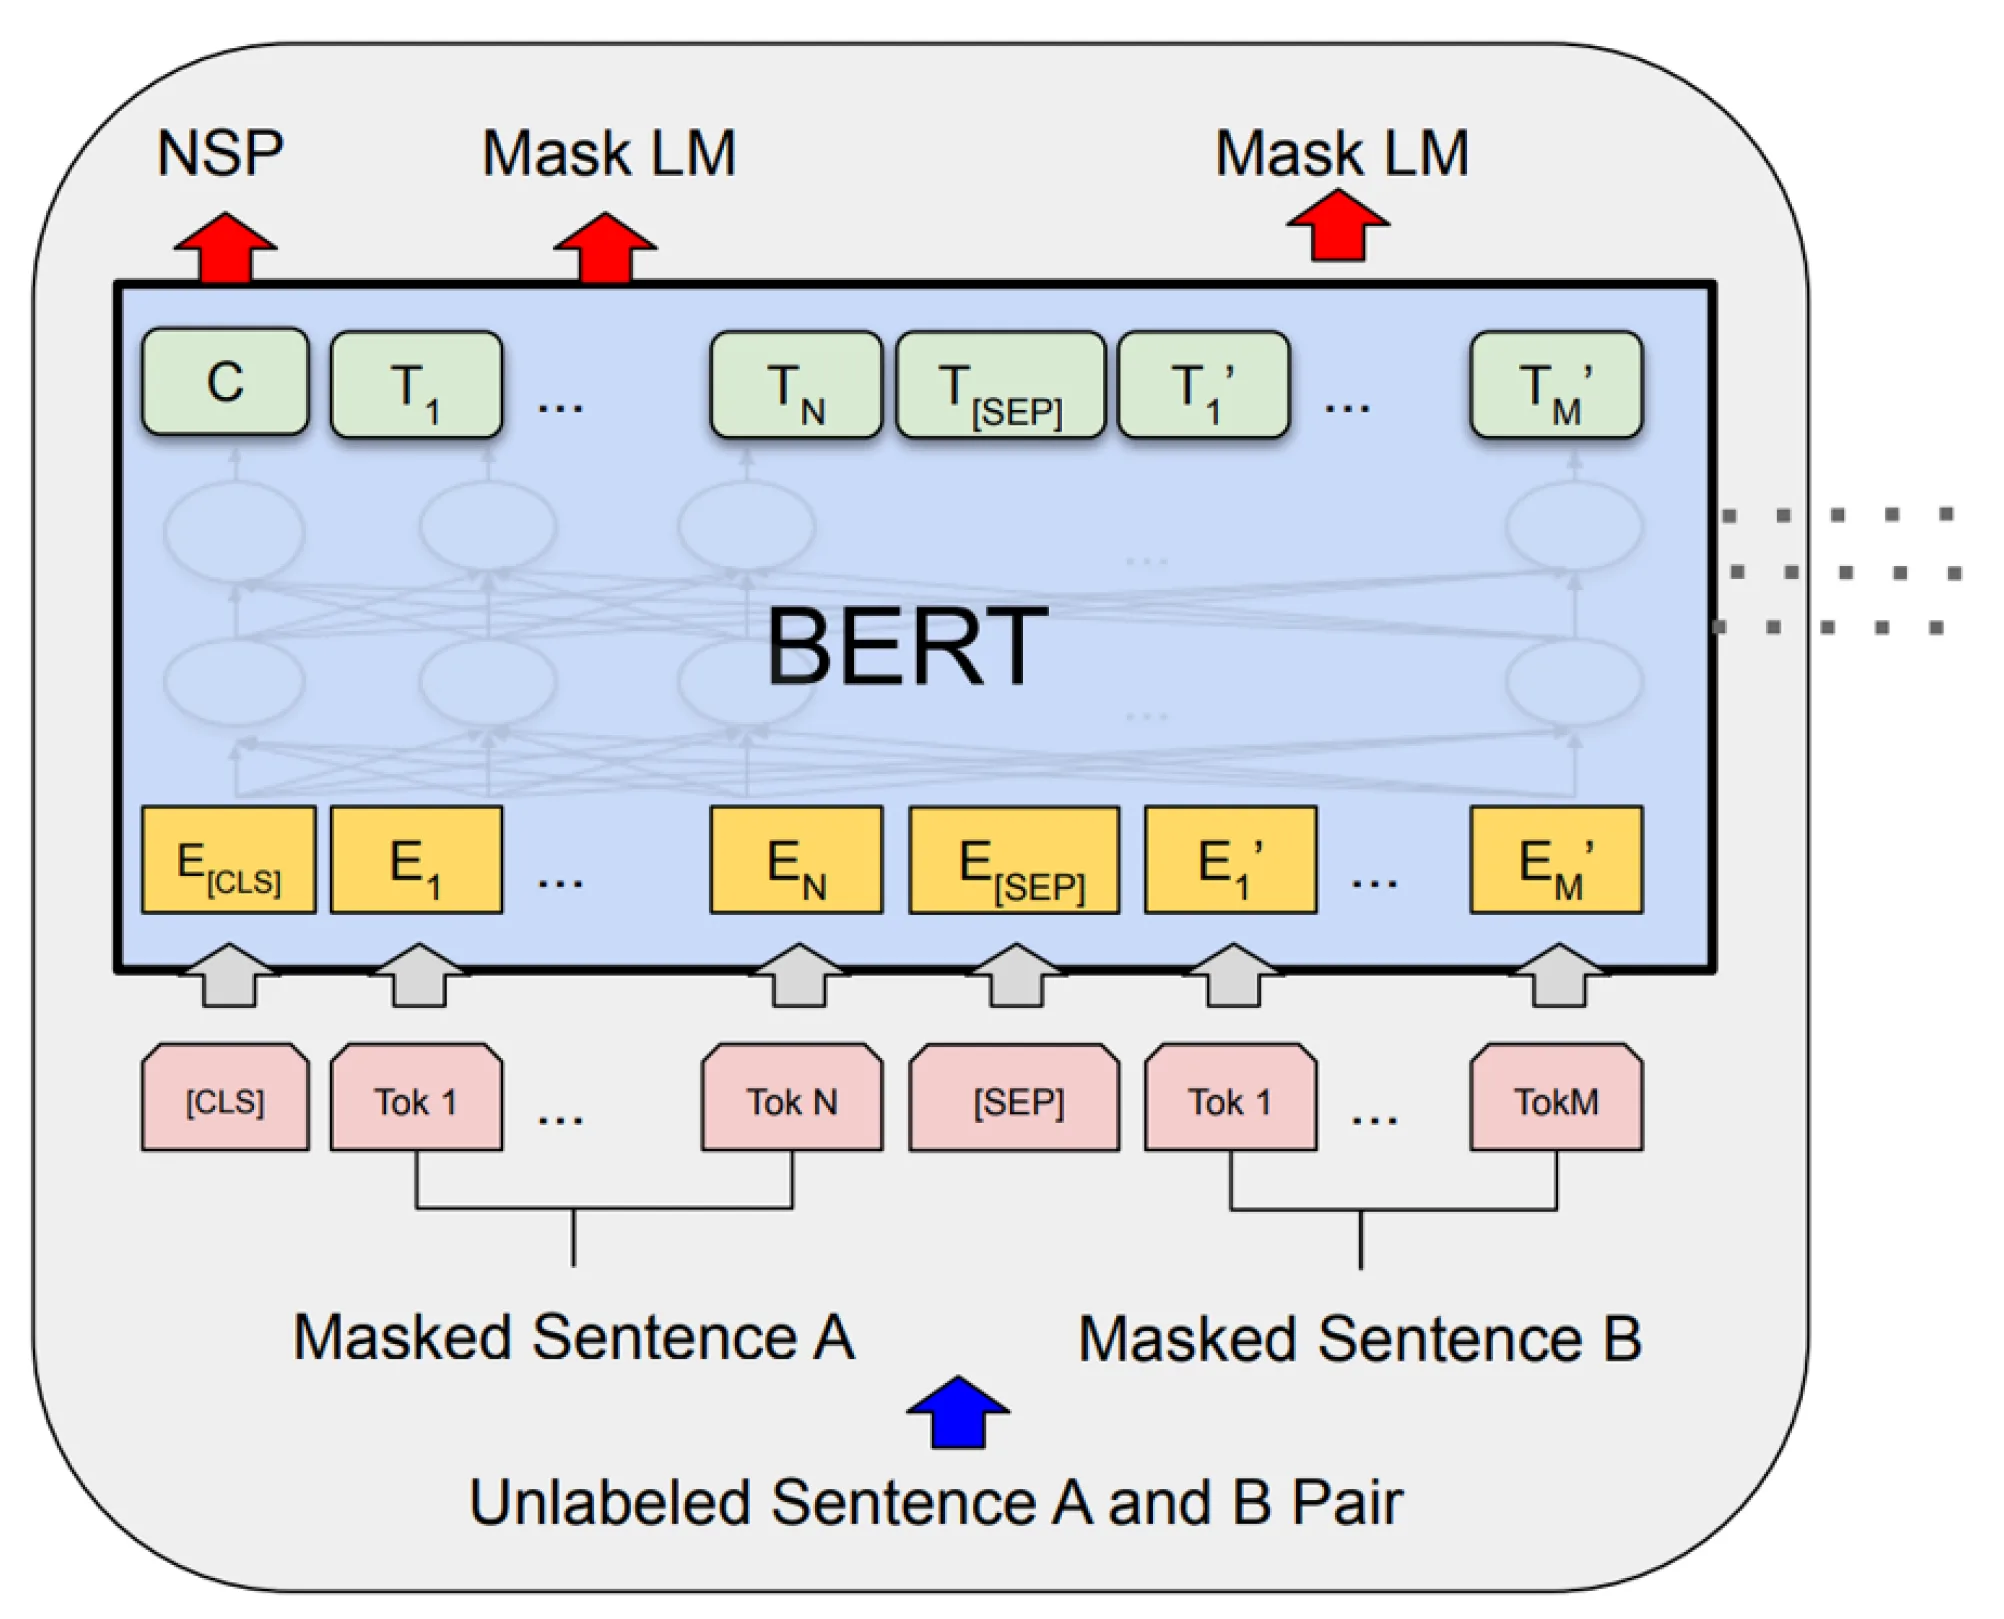

<br>

---
<br>А если взять декодер и предобучить на задаче генерации текста?

То мы получим **GPT** - Generative Pre-trained Transformer

Отличается тем, в особеноости гигантские модели, что можно просить модель решать определенную задачу без дообучения, а правильным промптом (prompt) - началом предложения (затравки) - несколько примеров или простых инструкций:


- 1. This sentence is in English. - Это предложение - на английском.
- 2. London is the capital of Great Britain. - Лондон - столица Великобритании.
- 3. Deep learning makes the world a little scary. - 

Модель по двум примерам понимает, что нужно сделать, и переводит третью строку.

<br>

[Управляем генерацией ruGPT-3: библиотека ruPrompts](https://habr.com/ru/company/sberdevices/blog/596103/)

<br>

---
<br>


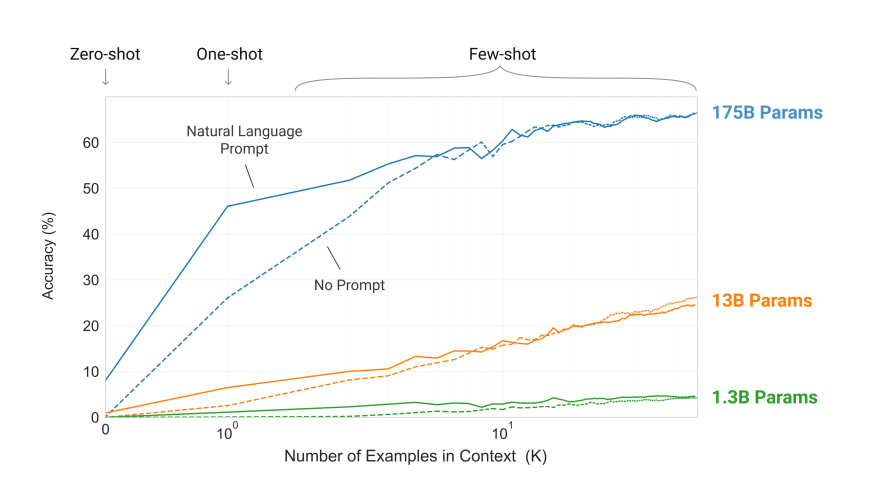

<br>

---
<br>

[Hugging Face](https://huggingface.co/) - репозиторий обученных моделей и датасетов

[What 🤗 Transformers can do](https://huggingface.co/docs/transformers/task_summary)

<br>

---
<br>

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 83.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 105.5 MB/s eta 0:00:00


## Анализ тональности

In [ ]:
import torch
from transformers import AutoModelForSequenceClassification
from transformers import BertTokenizerFast

tokenizer = BertTokenizerFast.from_pretrained('blanchefort/rubert-base-cased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('blanchefort/rubert-base-cased-sentiment', return_dict=True)

In [ ]:
classes = ["NEUTRAL", "POSITIVE", "NEGATIVE"]


def predict(text):
    inputs = tokenizer(text, max_length=100, padding=True, truncation=True, return_tensors='pt')
    outputs = model(**inputs)
    predicted = torch.nn.functional.softmax(outputs.logits, dim=1)
    predicted = torch.argmax(predicted, dim=1).numpy()
    return [classes[x] for x in predicted]


inputs = [
    "Это безумно плохо, настолько плохо, что даже хорошо",
    "Не видел ничего настолько впечатляющего, очень понравилось",
    "видеть этого больше не хочу",
    "хочу больше этого видеть",
    "что у вас сегодня в меню?",
]

predict(inputs)

['NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEUTRAL']

In [ ]:
!pip install transformers[sentencepiece]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Машинный перевод

In [ ]:
from transformers import pipeline

translator = pipeline("translation", model="Helsinki-NLP/opus-mt-ru-en")

In [ ]:
print(translator("Это безумно плохо, настолько плохо, что даже хорошо", max_length=50))

[{'translation_text': "It's crazy bad, so bad, it's even good."}]


## Языковое моделирование

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelWithLMHead

tokenizer = AutoTokenizer.from_pretrained('tinkoff-ai/ruDialoGPT-medium')
model = AutoModelWithLMHead.from_pretrained('tinkoff-ai/ruDialoGPT-medium')

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/usr/local/lib/python3.8/dist-packages/transformers/models/auto/modeling_auto.py:1248: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


['@@ПЕРВЫЙ@@ привет @@ВТОРОЙ@@ привет @@ПЕРВЫЙ@@ как дела? @@ВТОРОЙ@@нормально 👌🏻✨ а у тебя? Как сам? У меня тоже норм 😊🤗🥺💜🎉🌹',
 '@@ПЕРВЫЙ@@ привет @@ВТОРОЙ@@ привет @@ПЕРВЫЙ@@ как дела? @@ВТОРОЙ@@нормально,а у тебя?как сам?что нового?я на работе,устал немного)как день прошел?ты как?все в порядке?не заболела?)))))@@ВТОРОЙ@@да',
 '@@ПЕРВЫЙ@@ привет @@ВТОРОЙ@@ привет @@ПЕРВЫЙ@@ как дела? @@ВТОРОЙ@@нормально, а у тебя как? Как сам? Чем занимаешься? А то я волнуюсь за тебя, ты где сейчас? :D 😉😊😂😘�']

In [ ]:
inputs = tokenizer('@@ПЕРВЫЙ@@ привет @@ВТОРОЙ@@ привет @@ПЕРВЫЙ@@ как дела? @@ВТОРОЙ@@', return_tensors='pt')
generated_token_ids = model.generate(
    **inputs,
    top_k=10,
    top_p=0.95,
    num_beams=3,
    num_return_sequences=3,
    do_sample=True,
    no_repeat_ngram_size=2,
    temperature=1.2,
    repetition_penalty=1.2,
    length_penalty=1.0,
    eos_token_id=50257,
    max_new_tokens=40
)
context_with_response = [tokenizer.decode(sample_token_ids) for sample_token_ids in generated_token_ids]
context_with_response

Setting `pad_token_id` to `eos_token_id`:50257 for open-end generation.


['@@ПЕРВЫЙ@@ привет @@ВТОРОЙ@@ привет @@ПЕРВЫЙ@@ как дела? @@ВТОРОЙ@@нормально, а у тебя как? Как сам? Чем занимаешься? Не скучаешь по мне? А то я соскучилась) 🙃🤗🥺�',
 '@@ПЕРВЫЙ@@ привет @@ВТОРОЙ@@ привет @@ПЕРВЫЙ@@ как дела? @@ВТОРОЙ@@нормально, ты как? Как сам? Что нового? Чем занимаешься? Я вот в больнице лежу. А ты? Ты же в армии? Или я чего-то не знаю? :',
 '@@ПЕРВЫЙ@@ привет @@ВТОРОЙ@@ привет @@ПЕРВЫЙ@@ как дела? @@ВТОРОЙ@@нормально, а у тебя? как ты? чем занимаешься? что делаешь сегодня вечером? и вообще, как жизнь? :3 ^_^ 🥺💕�']